In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.express as px


In [51]:
happiness_df = pd.read_csv("happiness_data.csv")
happiness_df.head()

,Country,region,sub_region,year,life_ladder_log,gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government,happiness_score
0,Afghanistan,Asia,Southern Asia,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072,6.821305
1,Afghanistan,Asia,Southern Asia,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545,6.934636
2,Afghanistan,Asia,Southern Asia,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357,6.954634
3,Afghanistan,Asia,Southern Asia,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386,6.886723
4,Afghanistan,Asia,Southern Asia,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440,6.955109


In [32]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            2089 non-null   object 
 1   region                             2089 non-null   object 
 2   sub_region                         2089 non-null   object 
 3   year                               2089 non-null   int64  
 4   life_ladder_log                    2089 non-null   float64
 5   gdp_per_capita                     2062 non-null   float64
 6   social_support                     2076 non-null   float64
 7   healthy_life_expectancy_at_birth   2031 non-null   float64
 8   freedom_to_make_life_choices       2057 non-null   float64
 9   generosity                         2009 non-null   float64
 10  perceptions_of_corruption          1976 non-null   float64
 11  positive_affect                    2065 non-null   float

In [33]:
happiness_df.describe()

,year,life_ladder_log,gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government,happiness_score
count,2089.000000,2089.000000,2062.000000,2076.000000,2031.000000,2057.000000,2009.000000,1976.000000,2065.000000,2073.000000,1873.000000,2089.000000
mean,2013.727621,5.473747,9.378408,0.811542,63.180326,0.745462,0.000102,0.746474,0.651421,0.270544,0.483914,8.408817
std,4.455614,1.115567,1.143520,0.118935,6.948546,0.140751,0.161082,0.186136,0.105954,0.085849,0.191515,1.581903
min,2005.000000,2.178809,5.526723,0.290184,6.720000,0.257534,-0.335739,0.035198,0.178886,0.082737,0.068769,2.260026
25%,2010.000000,4.651972,8.473547,0.747664,58.965000,0.651689,-0.113172,0.689840,0.570057,0.207652,0.334808,7.751942
50%,2014.000000,5.405246,9.463269,0.834770,64.980003,0.767357,-0.023366,0.801339,0.662837,0.260328,0.467046,8.567952
75%,2017.000000,6.294282,10.347656,0.904682,68.362499,0.857677,0.090584,0.870789,0.737176,0.321706,0.616302,9.207077
max,2021.000000,8.018934,11.665803,0.987343,74.349998,0.985178,0.706377,0.983276,0.883586,0.704590,0.993604,24.281185


In [34]:
happiness_df = happiness_df.drop_duplicates()
happiness_df=happiness_df.dropna()

In [35]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747 entries, 0 to 2088
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            1747 non-null   object 
 1   region                             1747 non-null   object 
 2   sub_region                         1747 non-null   object 
 3   year                               1747 non-null   int64  
 4   life_ladder_log                    1747 non-null   float64
 5   gdp_per_capita                     1747 non-null   float64
 6   social_support                     1747 non-null   float64
 7   healthy_life_expectancy_at_birth   1747 non-null   float64
 8   freedom_to_make_life_choices       1747 non-null   float64
 9   generosity                         1747 non-null   float64
 10  perceptions_of_corruption          1747 non-null   float64
 11  positive_affect                    1747 non-null   float

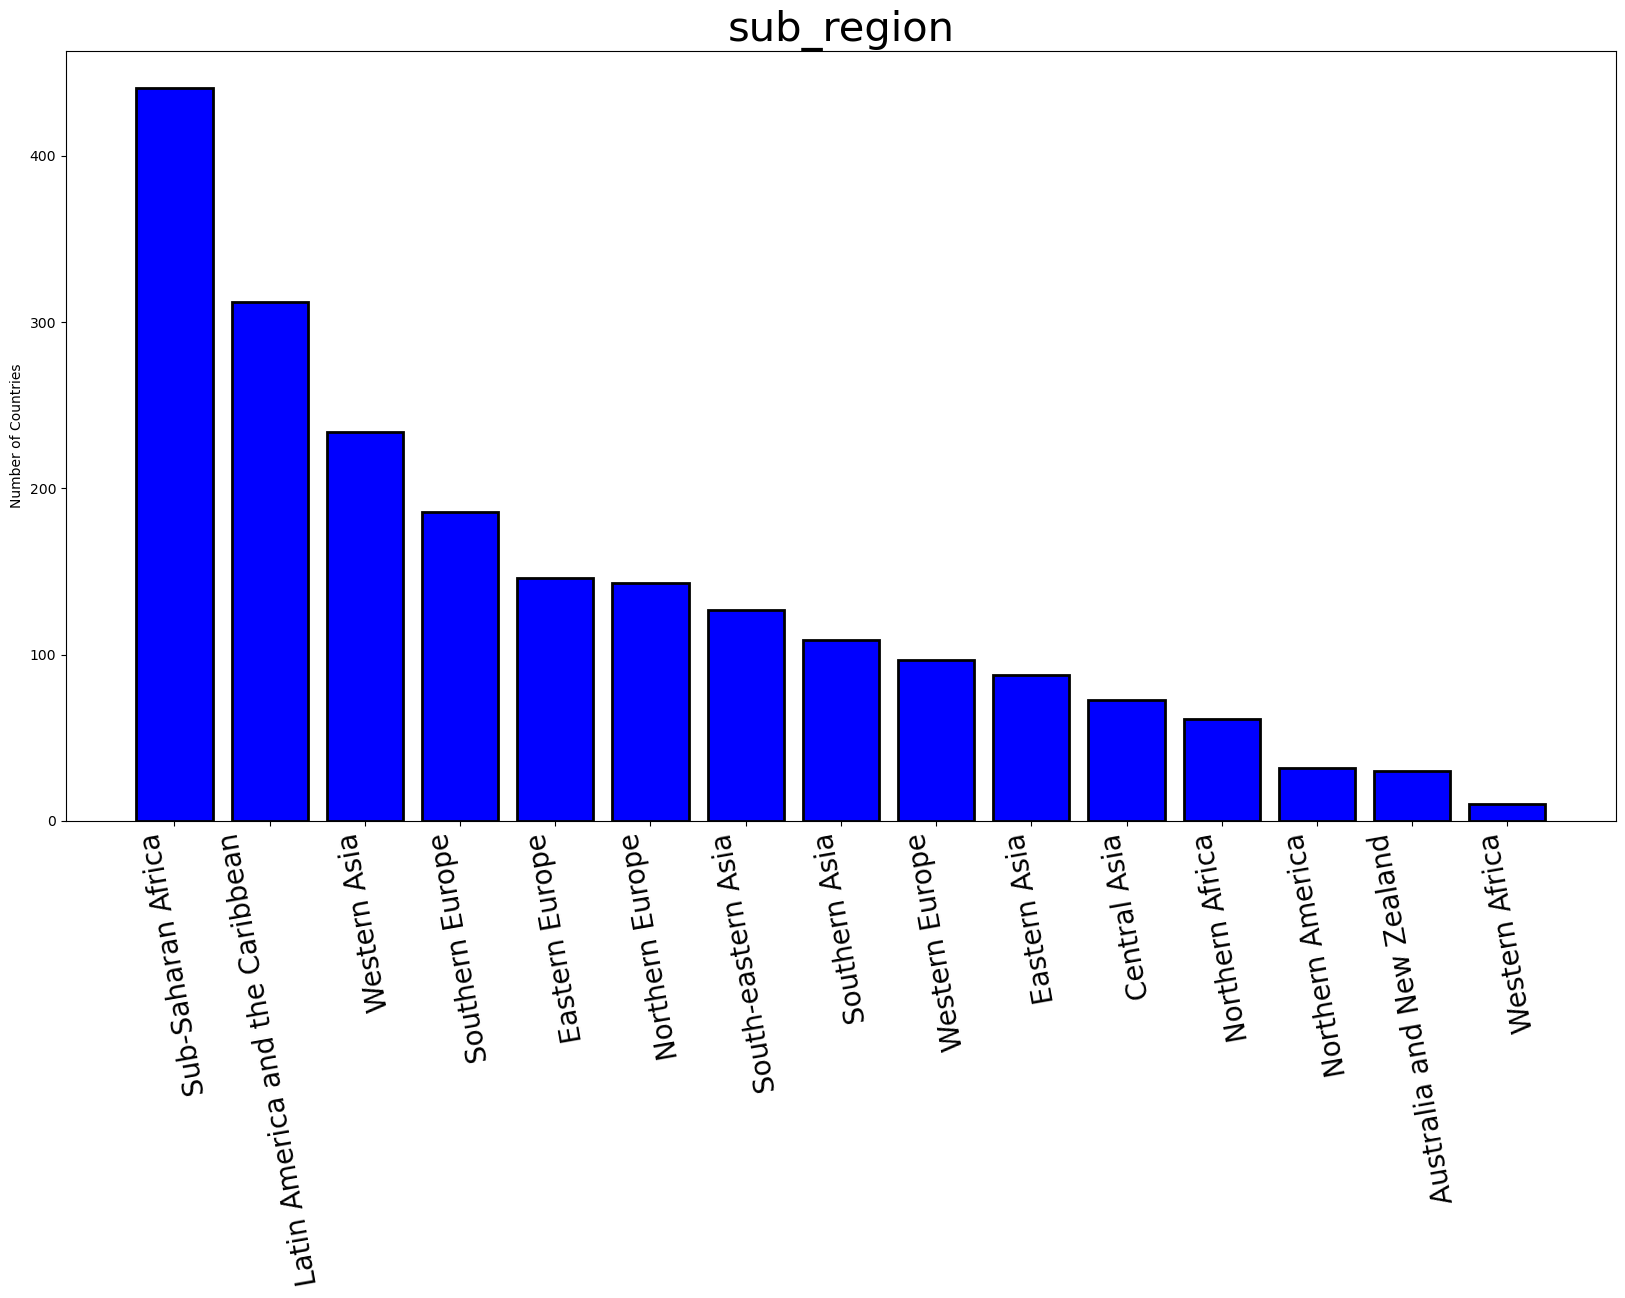

In [56]:
# Region & Sub_region

# Define Region
regions = happiness_df["sub_region"]


# How many countries are there
regions_counts = regions.value_counts()


plt.figure(figsize=(20,10))
plt.bar(regions_counts.index, regions_counts.values,color = "Blue", edgecolor = "black", linewidth = 2)
plt.xticks(rotation = "100",size = 20)
plt.ylabel("Number of Countries")
plt.title("sub_region",size = 30)
plt.show()

In [72]:
# Total countries in each sub-region
total_country = happiness_df.groupby('sub_region')[['Country']].count()
total_country.head(15)

,Country
sub_region,
Australia and New Zealand,30
Central Asia,73
Eastern Asia,88
Eastern Europe,146
Latin America and the Caribbean,312
Northern Africa,61
Northern America,32
Northern Europe,143
South-eastern Asia,127


In [73]:
# Number of Countries
happiness_df["Country"].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Republic of the Congo',
       'Democratic Republic of the Congo', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Swaziland', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'French Guiana', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Ja

# Visualiztion

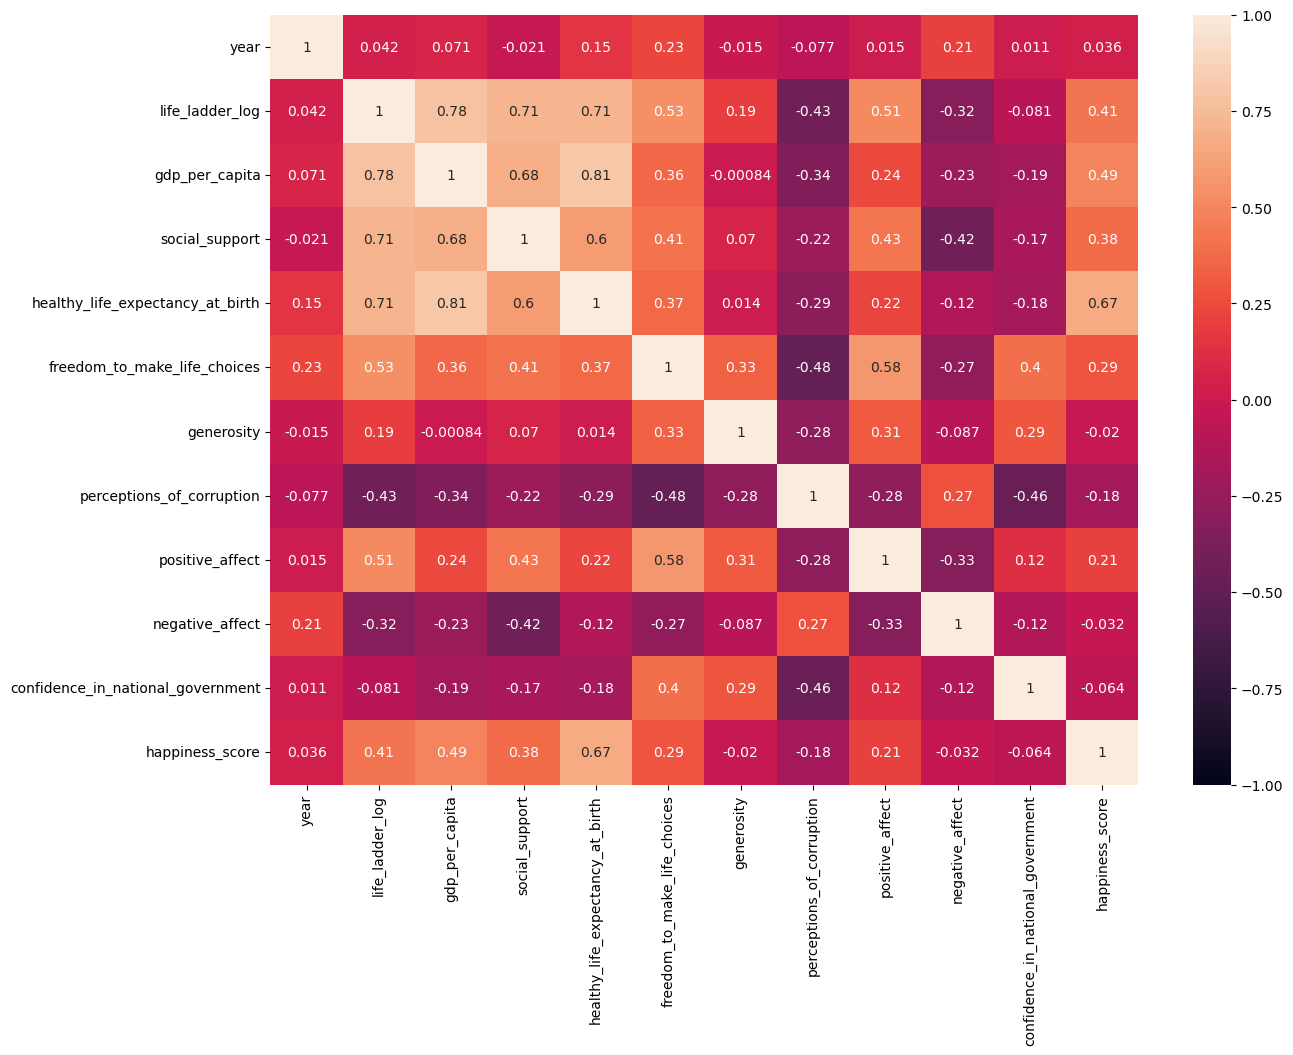

In [74]:
plt.figure(figsize=(14,10))
sns.heatmap(happiness_df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

Text(0, 0.5, 'Happiness Score')

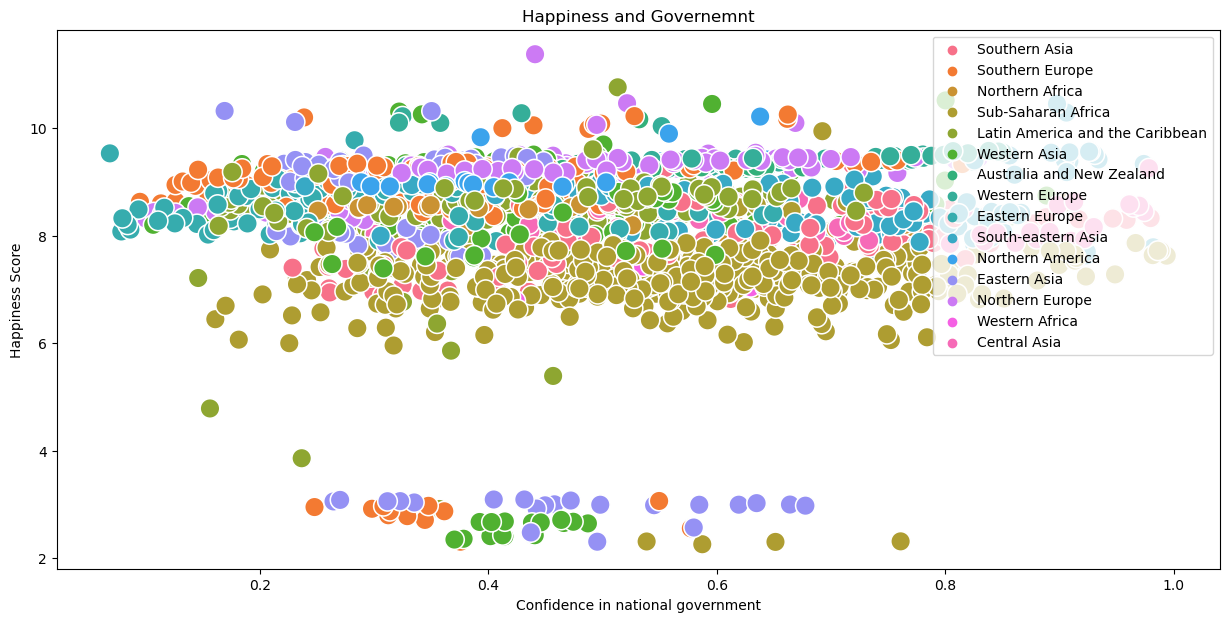

In [92]:
# Happniess with the government
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Happiness and Governemnt')
sns.scatterplot(x = happiness_df.confidence_in_national_government, y = happiness_df.happiness_score, hue = happiness_df.sub_region, s=200);

plt.legend(loc = 'upper right', fontsize = '10')
plt.xlabel('Confidence in national government')
plt.ylabel('Happiness Score')


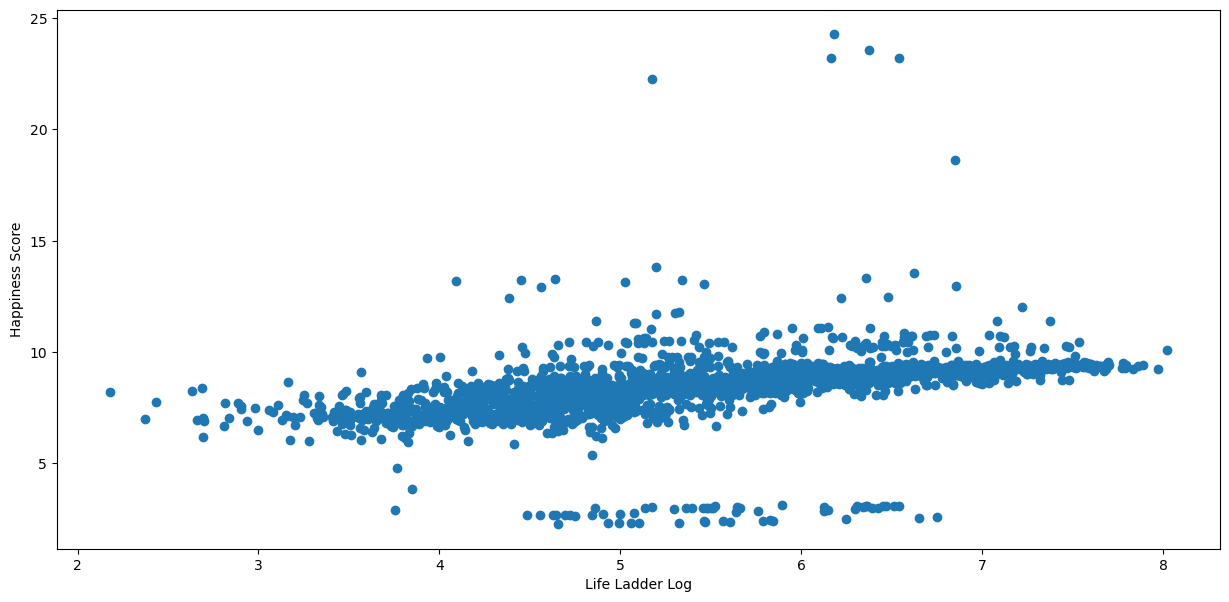

In [81]:
# Happiness and life ladder 
plt.scatter(happiness_df.life_ladder_log, happiness_df.happiness_score)
plt.xlabel('Life Ladder Log')
plt.ylabel('Happiness Score')
plt.show()


Text(0, 0.5, '')

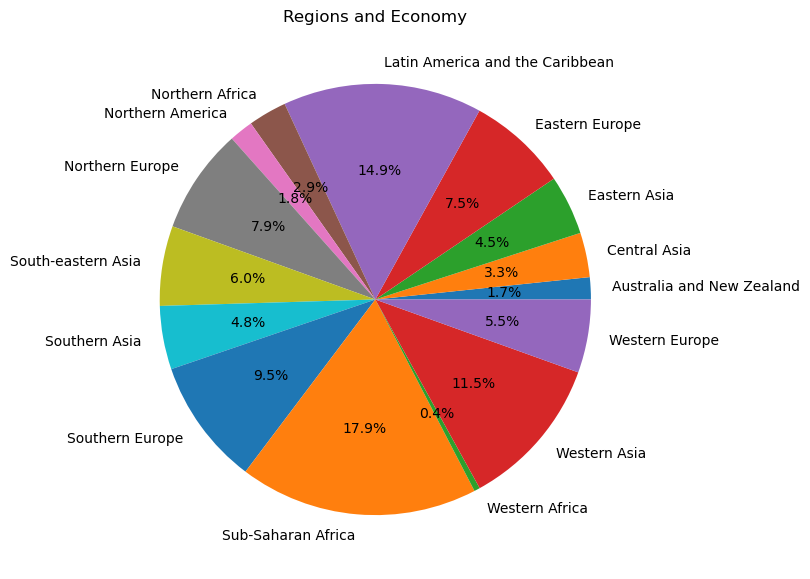

In [91]:
# Happiness and Economy
gdp_region = happiness_df.groupby('sub_region')['gdp_per_capita'].sum()

gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('Regions and Economy')
plt.ylabel('')

Text(0, 0.5, 'Happiness Score')

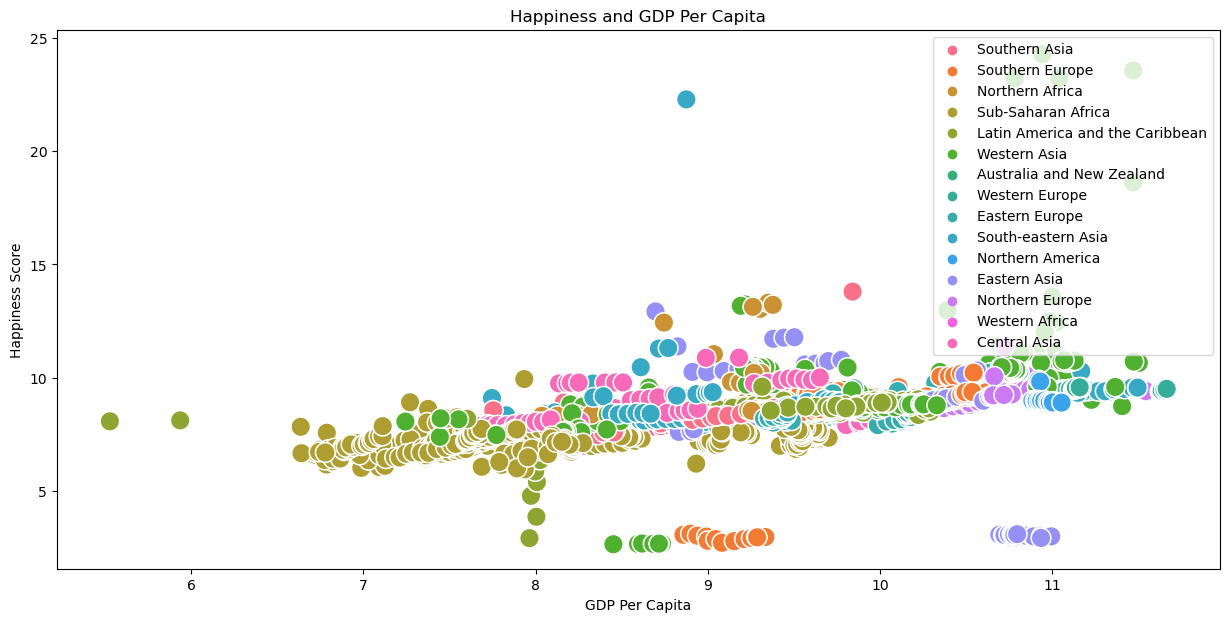

In [93]:
# Happines and GDP per Capita
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Happiness and GDP Per Capita')
sns.scatterplot(x = happiness_df.gdp_per_capita, y = happiness_df.happiness_score, hue = happiness_df.sub_region, s=200);

plt.legend(loc = 'upper right', fontsize = '10')
plt.xlabel('GDP Per Capita')
plt.ylabel('Happiness Score')